In [ ]:
# !pip install scikit-fuzzy --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## MODELAGEM DAS VARIÁVEIS DO PROBLEMA

In [ ]:
_40_days = np.arange(0, 40, 1)

marco_01 = ctrl.Antecedent(_40_days, 'Marco 1')
marco_02 = ctrl.Antecedent(_40_days, 'Marco 2')
marco_03 = ctrl.Antecedent(_40_days, 'Marco 3')
marco_04 = ctrl.Antecedent(_40_days, 'Marco 4')

score = ctrl.Consequent(np.arange(0, 100, 0.5), 'Score para faixa etária')

## Marco 1: Postura: barriga para cima, pernas e braços fletidos, cabeça lateralizada

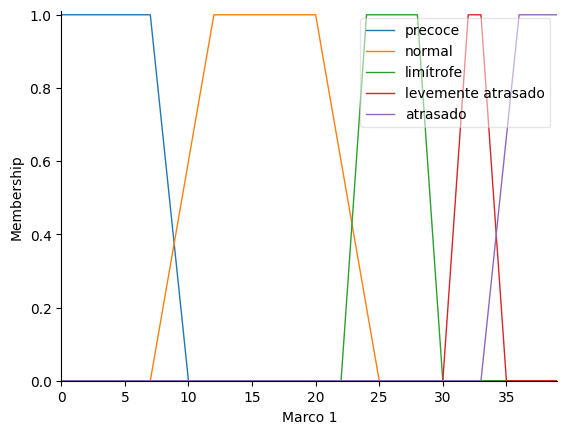

In [ ]:
marco_01['precoce'] = fuzz.trapmf(marco_01.universe, [0, 0, 7, 10])
marco_01['normal'] = fuzz.trapmf(marco_01.universe, [7, 12, 20, 25])
marco_01['limítrofe'] = fuzz.trapmf(marco_01.universe, [22, 24, 28, 30])
marco_01['levemente atrasado'] = fuzz.trapmf(marco_01.universe, [30, 32, 33, 35])
marco_01['atrasado'] = fuzz.trapmf(marco_01.universe, [33, 36, 40, 40])

marco_01.view()

## Marco 2: Observa um rosto

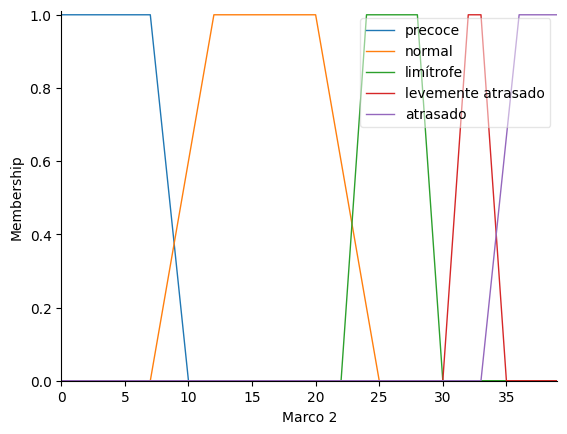

In [ ]:
marco_02['precoce'] = fuzz.trapmf(marco_02.universe, [0, 0, 7, 10])
marco_02['normal'] = fuzz.trapmf(marco_02.universe, [7, 12, 20, 25])
marco_02['limítrofe'] = fuzz.trapmf(marco_02.universe, [22, 24, 28, 30])
marco_02['levemente atrasado'] = fuzz.trapmf(marco_02.universe, [30, 32, 33, 35])
marco_02['atrasado'] = fuzz.trapmf(marco_02.universe, [33, 36, 40, 40])

marco_02.view()

## Marco 3: Reage ao som

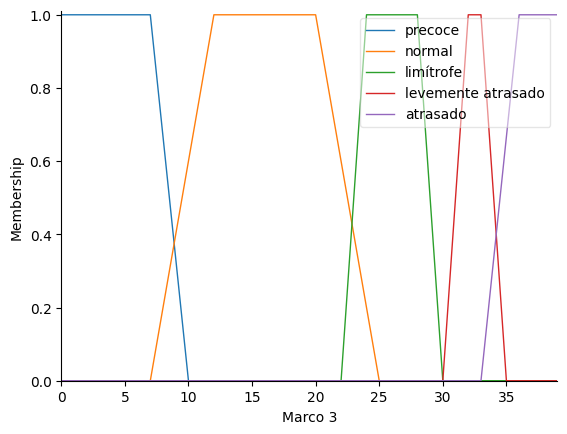

In [ ]:
marco_03['precoce'] = fuzz.trapmf(marco_03.universe, [0, 0, 7, 10])
marco_03['normal'] = fuzz.trapmf(marco_03.universe, [7, 12, 20, 25])
marco_03['limítrofe'] = fuzz.trapmf(marco_03.universe, [22, 24, 28, 30])
marco_03['levemente atrasado'] = fuzz.trapmf(marco_03.universe, [30, 32, 33, 35])
marco_03['atrasado'] = fuzz.trapmf(marco_03.universe, [33, 36, 40, 40])

marco_03.view()

## Marco 4: Eleva a cabeça

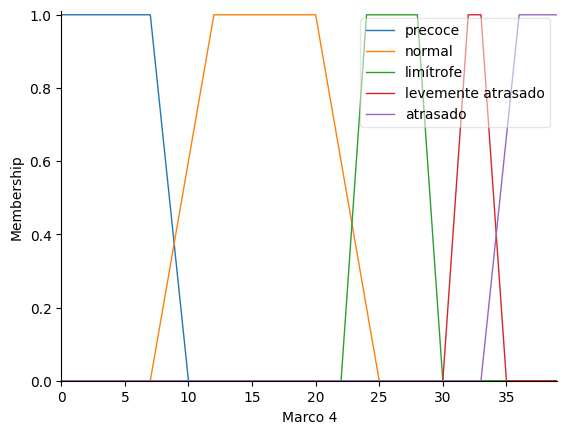

In [ ]:
marco_04['precoce'] = fuzz.trapmf(marco_04.universe, [0, 0, 7, 10])
marco_04['normal'] = fuzz.trapmf(marco_04.universe, [7, 12, 20, 25])
marco_04['limítrofe'] = fuzz.trapmf(marco_04.universe, [22, 24, 28, 30])
marco_04['levemente atrasado'] = fuzz.trapmf(marco_04.universe, [30, 32, 33, 35])
marco_04['atrasado'] = fuzz.trapmf(marco_04.universe, [33, 36, 40, 40])

marco_04.view()

## Score

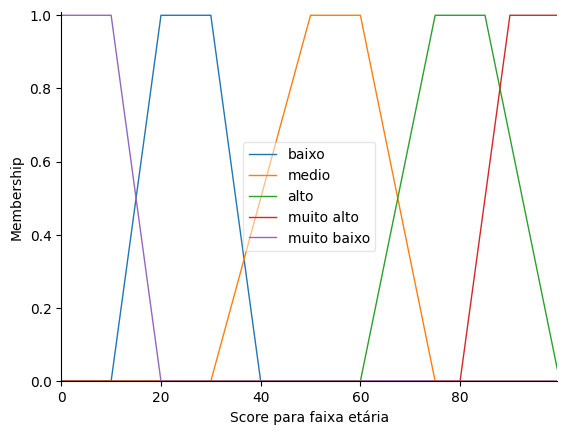

In [ ]:
score['muito baixo'] = fuzz.trapmf(score.universe, [0, 0, 10, 20])
score['baixo'] = fuzz.trapmf(score.universe, [10, 20, 30, 40])
score['medio'] = fuzz.trapmf(score.universe, [30, 50, 60, 75])
score['alto'] = fuzz.trapmf(score.universe, [60, 75, 85, 100])
score['muito alto'] = fuzz.trapmf(score.universe, [80, 90, 100, 100])

#score.automf(number=3, names=['baixo', 'medio', 'alto'])

score.view()

## **BASE DE REGRAS**

In [ ]:
#['precoce', 'normal', 'limítrofe', 'levemente atrasado', 'atrasado']

rule1 = ctrl.Rule(marco_01['precoce'] & marco_02['precoce'] & marco_03['precoce'] & marco_04['precoce'], score['muito alto'])
rule2 = ctrl.Rule(marco_01['normal'] & marco_02['normal'] & marco_03['normal'] & marco_04['normal'], score['alto'])
rule3 = ctrl.Rule(marco_01['limítrofe'] & marco_02['limítrofe'] & marco_03['limítrofe'] & marco_04['limítrofe'], score['medio'])
rule4 = ctrl.Rule(marco_01['levemente atrasado'] & marco_02['levemente atrasado'] & marco_03['levemente atrasado'] & marco_04['levemente atrasado'], score['baixo'])
rule5 = ctrl.Rule(marco_01['atrasado'] & marco_02['atrasado'] & marco_03['atrasado'] & marco_04['atrasado'], score['muito baixo'])

rule6 = ctrl.Rule(marco_01['precoce'] & marco_02['normal'] & marco_03['normal'] & marco_04['precoce'], score['alto'])
rule7 = ctrl.Rule(marco_01['normal'] & marco_02['levemente atrasado'] & marco_03['normal'] & marco_04['normal'], score['medio'])
rule8 = ctrl.Rule(marco_01['limítrofe'] & marco_02['limítrofe'] & marco_03['normal'] & marco_04['precoce'], score['medio'])
rule9 = ctrl.Rule(marco_01['atrasado'] & marco_02['levemente atrasado'] & marco_03['levemente atrasado'] & marco_04['normal'], score['baixo'])
rule10 = ctrl.Rule(marco_01['levemente atrasado'] & marco_02['atrasado'] & marco_03['precoce'] & marco_04['levemente atrasado'], score['baixo'])

rule11 = ctrl.Rule(marco_01['precoce'] | marco_02['precoce'] | marco_03['precoce'] | marco_04['precoce'], score['alto'])
rule12 = ctrl.Rule(marco_01['normal'] | marco_02['normal'] | marco_03['limítrofe'] | marco_04['normal'], score['medio'])
rule13 = ctrl.Rule((marco_01['limítrofe'] | marco_02['levemente atrasado']) & (marco_03['normal'] | marco_04['normal']), score['medio'])
rule14 = ctrl.Rule((marco_01['atrasado'] & marco_02['levemente atrasado']) | (marco_03['atrasado'] & marco_04['levemente atrasado']), score['muito baixo'])
rule15 = ctrl.Rule((marco_01['levemente atrasado'] | marco_02['atrasado']) & (marco_03['precoce'] | marco_04['normal']), score['medio'])

rule16 = ctrl.Rule(marco_01['normal'] & marco_02['precoce'] & marco_03['levemente atrasado'] & marco_04['normal'], score['medio'])
rule17 = ctrl.Rule(marco_01['limítrofe'] & marco_02['normal'] & marco_03['atrasado'] & marco_04['precoce'], score['baixo'])
rule18 = ctrl.Rule(marco_01['atrasado'] | marco_02['normal'] | marco_03['precoce'] | marco_04['levemente atrasado'], score['medio'])
rule19 = ctrl.Rule(marco_01['precoce'] & (marco_02['atrasado'] | marco_03['atrasado']) & marco_04['normal'], score['medio'])
rule20 = ctrl.Rule((marco_01['normal'] | marco_02['limítrofe']) & marco_03['precoce'] & marco_04['levemente atrasado'], score['medio'])

rule21 = ctrl.Rule(marco_01['levemente atrasado'] & (marco_02['limítrofe'] | marco_03['normal']) & marco_04['precoce'], score['medio'])
rule22 = ctrl.Rule((marco_01['atrasado'] & marco_02['precoce']) | (marco_03['normal'] & marco_04['levemente atrasado']), score['baixo'])
rule23 = ctrl.Rule(marco_01['precoce'] & marco_02['atrasado'] & (marco_03['normal'] | marco_04['limítrofe']), score['medio'])
rule24 = ctrl.Rule((marco_01['normal'] & marco_02['levemente atrasado']) | (marco_03['atrasado'] & marco_04['normal']), score['baixo'])
rule25 = ctrl.Rule(marco_01['limítrofe'] & (marco_02['precoce'] | marco_03['levemente atrasado']) & marco_04['normal'], score['medio'])


## Predição

In [ ]:
score_predicao = ctrl.ControlSystem([rule1, rule2, rule3, rule4,
                                     rule5, rule6, rule7, rule8,
                                     rule9, rule10, rule11, rule12,
                                     rule13, rule14, rule15, rule16,
                                     rule14, rule15, rule16, rule17,
                                     rule18, rule19, rule20, rule21,
                                     rule22, rule23, rule24, rule25])

recomendacao = ctrl.ControlSystemSimulation(score_predicao)

In [ ]:
recomendacao.input['Marco 1'] = 10
recomendacao.input['Marco 2'] = 21
recomendacao.input['Marco 3'] = 25
recomendacao.input['Marco 4'] = 38

recomendacao.compute()

print(recomendacao.output['Score Criança (faixa-etária 1)'])
score.view(sim = recomendacao)

## **ANÁLISE DAS SUPERFÍCIES**

In [ ]:
risco_values = np.zeros((len(_40_days), len(_40_days)))

for i, m1 in enumerate(_40_days):
    for j, m2 in enumerate(_40_days):
        recomendacao.input['Marco 1'] = m1
        recomendacao.input['Marco 2'] = m2
        recomendacao.compute()
        risco_values[i, j] = recomendacao.output['Risco']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(_40_days, _40_days)

surf = ax.plot_surface(X, Y, risco_values, cmap='viridis', edgecolor='k')

ax.set_xlabel('Marco 1')
ax.set_ylabel('Marco 2')
ax.set_zlabel('Score')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.title('Fuzzy Score Control')
plt.show()

# **DÚVIDA** (desconsiderar por enquanto)

## Marco 15: Localiza o som

In [ ]:
# Como ter 2
marco_15 = ctrl.Antecedent(_12_months, '15° Marco')

marco_15['levemente precoce'] = fuzz.trapmf(marco_15.universe, [0, 0, 2, 4])
marco_15['normal'] = fuzz.trapmf(marco_15.universe, [1, 3, 6, 8])
marco_15['levemente atrasado'] = fuzz.trapmf(marco_15.universe, [5, 7, 9, 11])
marco_15['atrasado'] = fuzz.trapmf(marco_15.universe, [8, 10, 12, 12])

In [ ]:
marco_15.view()

In [ ]:
marco_15 = np.arange(0, 13, 0.1)

# Definição das funções de pertinência fuzzy
baixo1 = fuzz.trapmf(marco_15, [0, 0, 2, 4])
baixo2 = fuzz.trapmf(marco_15, [5, 7, 9, 11])

# União das funções de pertinência "baixo"
baixo = np.maximum(baixo1, baixo2)

# Visualização da função de pertinência "baixo"
plt.figure()

plt.plot(marco_15, baixo, 'b', label='Baixo')

plt.title('Função de Pertinência "Baixo"')
plt.xlabel('Valor de Marco 15')
plt.ylabel('Pertinência')

plt.legend()
plt.show()